<a href="https://colab.research.google.com/github/bengy124/Drug-Discovery-Project/blob/main/Drug_Discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Installing chembl web resource
! pip install chembl_webresource_client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: attrs
    Found existing installation: attrs 23.1.0
    Uninstalling attrs-23.1.0:
      Successfully uninstalled attrs-23.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
jsonschema 4.19.2 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.
referencing 0.31.1 requires attrs>=22.2.0, but you have attrs 21.4.0 which is incompatible.


In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client


In [ ]:
#Searching of target
target = new_client.target
target_query = target.search('aromatase') #target input
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P11511', 'xref_name': None, 'xre...",Homo sapiens,Cytochrome P450 19A1,20.0,False,CHEMBL1978,"[{'accession': 'P11511', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P22443', 'xref_name': None, 'xre...",Rattus norvegicus,Cytochrome P450 19A1,20.0,False,CHEMBL3859,"[{'accession': 'P22443', 'component_descriptio...",SINGLE PROTEIN,10116


In [ ]:
#Selection of target
selected_target = targets.target_chembl_id[0]
selected_target

'CHEMBL1978'

In [ ]:
#Creating filtered df for IC50 of selected target
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type='IC50')
df=pd.DataFrame.from_dict(res)
df

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [ ]:
#Coverting df to csv
df.to_csv('bioactivity_data.csv',index=False)

In [ ]:
#Saving to google drive
from google.colab import drive
drive.mount('/content/gdrive/',force_remount=True)

Mounted at /content/gdrive/


In [ ]:
!mkdir "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

mkdir: cannot create directory ‘/content/gdrive/My Drive/Projects/Colab Notebooks/data’: File exists


In [ ]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

In [ ]:
!ls -l "/content/gdrive/My Drive/Projects/Colab Notebooks/data"

total 2834
-rw------- 1 root root 1494977 Dec  8 21:50 bioactivity_data.csv
-rw------- 1 root root  576050 Oct 23  2022 bioactivity_preprocessed_data.csv
-rw------- 1 root root  829990 Aug 22 18:00 results.zip


In [ ]:
!head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,,,BAO_0000190,BAO_0000357,single protein format,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,,,CHEMBL1133116,J Med Chem,2000,"{'bei': '15.62', 'le': '0.29', 'lle': '0.86', 'sei': '12.21'}",CHEMBL341591,,CHEMBL341591,5.15,0,http://www.openphacts.org/uni

*Saving to Google Drive*

In [ ]:
#Filtering to remove NaN values
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()]
df2

<ipython-input-17-955aac5800f0>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()]


,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2961,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742461,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,50.1
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031
2964,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886566,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.042


In [ ]:
#Removing duplicates
df2_1 = df2.drop_duplicates(['canonical_smiles'])
df2_1

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,82585,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,7.1
1,None,None,94540,[],CHEMBL666794,Inhibition of Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,50.0
2,None,None,112960,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.238
3,None,None,116766,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.057
4,None,None,118017,[],CHEMBL661700,In vitro inhibition of human Cytochrome P450 19A1,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2955,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742455,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.09
2956,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24742456,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5118295,Inhibition of aromatase in human JEG-3 cells u...,B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,nM,UO_0000065,None,0.72
2962,None,None,24783443,[],CHEMBL5130158,Inhibition of human placental microsome CYP19 ...,A,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,10.0
2963,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24886565,[],CHEMBL5157477,Inhibition of aromatase (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Cytochrome P450 19A1,9606,None,None,IC50,uM,UO_0000065,None,0.031


In [ ]:
#Creating new df with selected rows
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_1[selection]
df3


,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.0
...,...,...,...
2955,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09
2956,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72
2962,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.0
2963,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.0


In [ ]:
#Output to csv
df3.to_csv('new_bioacivity_preprocessed.csv', index = False)

In [ ]:
df3_1 = pd.read_csv('new_bioacivity_preprocessed.csv')

In [ ]:
#Function to assign class identification of either active, inactive, or intermediate based on standard_value
bioactivity_class = []
for i in df3_1.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")

In [ ]:
#New df with bioactivity_class included
bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
df4=pd.concat([df3_1,pd.Series(bioactivity_class)], axis=1)
df4

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active
...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active


In [ ]:
#Output to csv
df4.to_csv('bioactivity_data.csv', index=False)

In [ ]:
! ls -l

total 300
-rw-r--r-- 1 root root 155881 Dec  8 21:50 bioactivity_data.csv
drwx------ 5 root root   4096 Dec  8 21:50 gdrive
-rw-r--r-- 1 root root 136437 Dec  8 21:50 new_bioacivity_preprocessed.csv
drwxr-xr-x 1 root root   4096 Dec  4 14:27 sample_data


In [ ]:
!cp bioactivity_data.csv "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

cp: cannot create regular file '/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data': No such file or directory


In [ ]:
! ls "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

ls: cannot access '/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data': No such file or directory


In [ ]:
#Installing conda and rdkit
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2023-12-08 21:50:09--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   303MB/s    in 0.3s    

2023-12-08 21:50:09 (303 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

In [ ]:
df5 = pd.read_csv('bioactivity_data.csv')

In [ ]:
#Removing canonical_smiles
df_nosmiles = df5.drop(columns='canonical_smiles')

#Empty list to store longest compound from each canonical_smiles
smiles = []

#Loop to split canonical_smile into compunds and then append the longest compound from split compounds
for i in df5.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd,key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')



In [ ]:
#New df with updated canonical_smiles
df_cleaned_smiles = pd.concat([df_nosmiles,smiles],axis=1)
df_cleaned_smiles

,molecule_chembl_id,standard_value,bioactivity_class,canonical_smiles
0,CHEMBL341591,7100.00,intermediate,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12
1,CHEMBL2111947,50000.00,inactive,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...
2,CHEMBL431859,238.00,active,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21
3,CHEMBL113637,57.00,active,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21
4,CHEMBL112021,54.00,active,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21
...,...,...,...,...
2111,CHEMBL5203413,0.09,active,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2112,CHEMBL5179009,0.72,active,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1
2113,CHEMBL5184829,10000.00,inactive,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...
2114,CHEMBL5176279,31.00,active,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1


In [ ]:
import numpy as np
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

     |████████████████████████████████| 29.5 MB 50 kB/s 


In [ ]:
#Function to calculate lipinski descriptors
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) #Converting each smiles string into a molecule using rdkit
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:
        #Calculating descriptors for each molecule
        desc_MolWt = Descriptors.MolWt(mol) #Molecular weight
        desc_MolLogP = Descriptors.MolLogP(mol) #LogP
        desc_NumHDonors = Lipinski.NumHDonors(mol) #Number of H donors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol) #Number of HG acceptors

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1
    #Defining column names
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    #New df with calculated descriptors
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

In [ ]:
#Lipinski function applied to df_cleaned_smiles.canonical_smiles to calculate descriptors
df_lipinski=lipinski(df_cleaned_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2111,368.396,3.93578,0.0,6.0
2112,382.423,4.32588,0.0,6.0
2113,373.416,3.11580,2.0,5.0
2114,369.446,3.85650,1.0,7.0


In [ ]:
#Adding lipinski descriptors
df_combined=pd.concat([df5,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,7100.00,intermediate,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,50000.00,inactive,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,238.00,active,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,57.00,active,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,54.00,active,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.09,active,368.396,3.93578,0.0,6.0
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,0.72,active,382.423,4.32588,0.0,6.0
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,10000.00,inactive,373.416,3.11580,2.0,5.0
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,31.00,active,369.446,3.85650,1.0,7.0


In [ ]:
#Function to normalize standard_value
def norm_value(input):
    norm = []

    #Loop to set a value to 100000000 if it is greater than 100000000
    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    #Add standard_value_norm as new column and drop standard_value
    input['standard_value_norm'] = norm
    x = input.drop('standard_value',1)

    return x

In [ ]:
#Function to calculte pIC50 values
def pIC50(input):
    pIC50 = []
    #Loop to convert standard_value_norm from nM to M by multiplying by 10^-9
    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    #Add calculated pIC50 values as new column and drop standard_value_norm
    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)

    return x


In [ ]:
df_combined.standard_value.describe()

count      2116.000000
mean      14342.985445
std       50757.159724
min           0.000000
25%         120.000000
50%        1200.000000
75%        8495.000000
max      777000.000000
Name: standard_value, dtype: float64

In [ ]:
#Creating new df using transformation functions
df_norm=norm_value(df_combined)
df_norm

<ipython-input-38-79981290d2ab>:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value',1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,0.09
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,0.72
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,10000.00
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,31.00


In [ ]:
df_norm.standard_value_norm.describe()

count      2116.000000
mean      14342.985445
std       50757.159724
min           0.000000
25%         120.000000
50%        1200.000000
75%        8495.000000
max      777000.000000
Name: standard_value_norm, dtype: float64

In [ ]:
df_final=pIC50(df_norm)
df_final

<ipython-input-36-996653885b41>:6: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
<ipython-input-36-996653885b41>:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,10.045757
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,9.142668
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,5.000000
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,7.508638


In [ ]:
df_final.pIC50.describe()

count    2116.000000
mean             inf
std              NaN
min         3.109579
25%         5.070837
50%         5.920819
75%         6.920819
max              inf
Name: pIC50, dtype: float64

In [ ]:
#Output to csv
df_final.to_csv('bioactivity_data_pIC50_1.csv')

In [ ]:
#Filtering out rows containing intermediate bioactivity class
df_2class=df_final[df_final.bioactivity_class !='intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2111,CHEMBL5203413,CC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,368.396,3.93578,0.0,6.0,10.045757
2112,CHEMBL5179009,CCC#CCOc1ccc2cc(C(c3ccc(C#N)cc3)n3cncn3)oc2c1,active,382.423,4.32588,0.0,6.0,9.142668
2113,CHEMBL5184829,O=C(Nc1ccc2[nH]ncc2c1)[C@]12ON=C(c3cccnc3)[C@H...,inactive,373.416,3.11580,2.0,5.0,5.000000
2114,CHEMBL5176279,CCOC(=O)Cc1csc(N/N=C/c2ccc3cc(OC)ccc3c2)n1,active,369.446,3.85650,1.0,7.0,7.508638


In [ ]:
#Output to csv
df_2class.to_csv('bioactivity_data_pIC50_2.csv')

In [ ]:
#Creating figures to show bioactivy and lipinski descriptors
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt


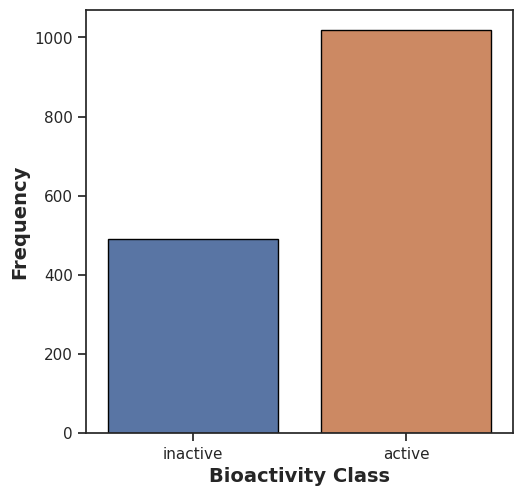

In [ ]:
plt.figure(figsize=(5.5,5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')


In [ ]:
df_scattplt = pd.read_csv('bioactivity_data_pIC50_2.csv')
df_scattplt.replace([np.inf, -np.inf], np.nan, inplace=True)

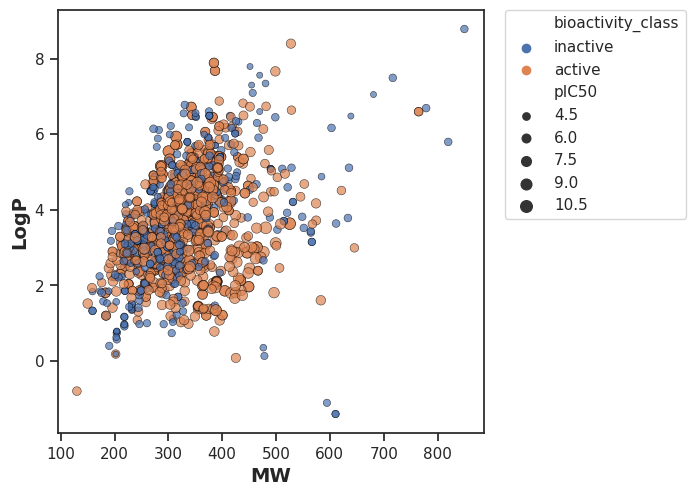

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_scattplt, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

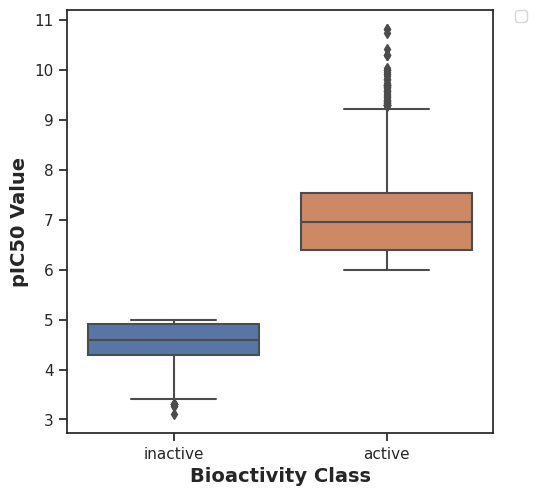

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='pIC50',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 Value', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_ic50.pdf')

In [ ]:
#Function to conduct a Mann-Whitney U test for descriptors
def mannwhitney(descriptor, verbose=False):

  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

  #Set the seed for the random number generator
  seed(1)

  selection = [descriptor, 'bioactivity_class'] #Select the descriptor and bioactivity_class columns from df_2class
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active'] #Filter the DataFrame to keep only the rows where bioactivity_class is active
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive'] #Filter the DataFrame to keep only the rows where bioactivity_class is inactive
  inactive = inactive[descriptor]

  #Conduct the Mann-Whitney U test
  stat, p = mannwhitneyu(active, inactive)

  #Set significance level
  alpha = 0.05
  #Results conditons
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  #Df with results
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

In [ ]:
#Conducting Mann-Whitney U test and creating figures
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,501348.0,2.316977e-218,0.05,Different distribution (reject H0)


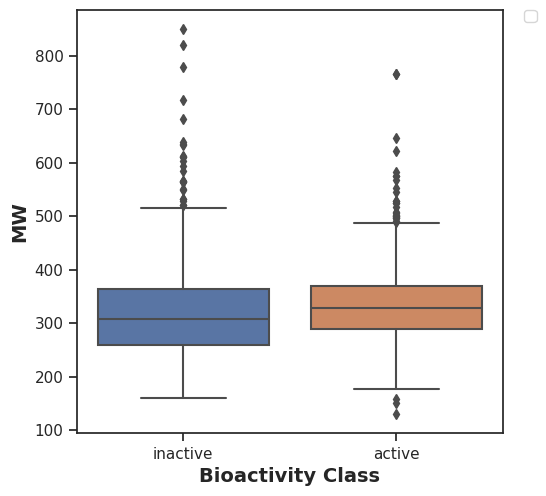

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='MW',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_MW.pdf')

In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,284791.0,0.000018,0.05,Different distribution (reject H0)


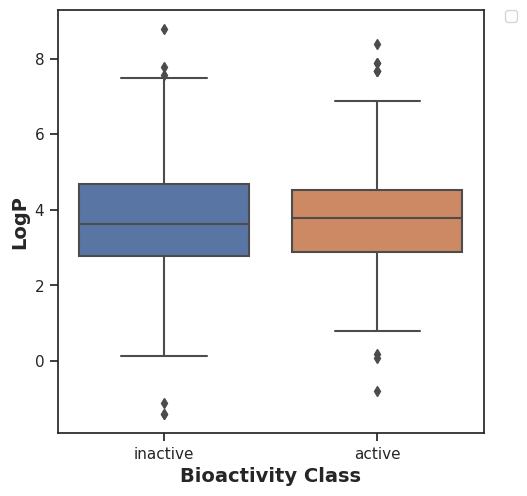

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='LogP',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_LogP.pdf')

In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,252241.5,0.843704,0.05,Same distribution (fail to reject H0)


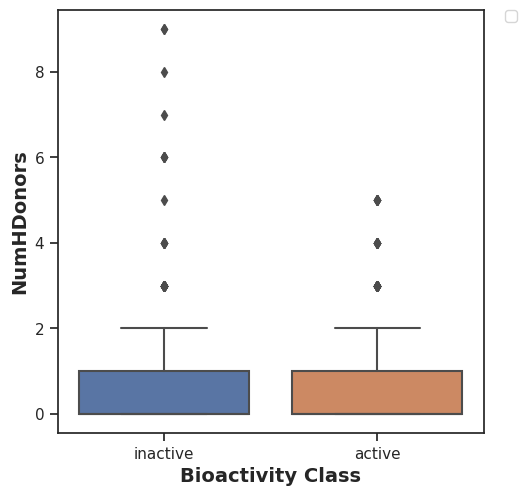

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHDonors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHDonors.pdf')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,234631.0,0.023067,0.05,Different distribution (reject H0)


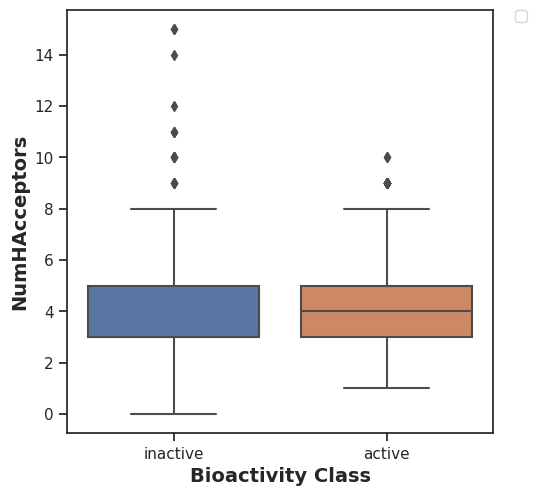

In [ ]:
plt.figure(figsize=(5.5,5.5))
sns.boxplot(x='bioactivity_class',y='NumHAcceptors',data=df_2class)
plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)

plt.savefig('plot_NumHAcceptors.pdf')

In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,270837.0,0.009792,0.05,Different distribution (reject H0)


In [ ]:
#Installing PaDEL
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-12-08 21:52:13--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-12-08 21:52:14--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  48.8MB/s    in 0.5s    

2023-12-08 21:52:17 (48.8 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2023-12-08 21:52:17--  https://git

In [ ]:
! unzip padel.zip

Archive:  padel.zip
   creating: PaDEL-Descriptor/
  inflating: __MACOSX/._PaDEL-Descriptor  
  inflating: PaDEL-Descriptor/MACCSFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._MACCSFingerprinter.xml  
  inflating: PaDEL-Descriptor/AtomPairs2DFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._AtomPairs2DFingerprinter.xml  
  inflating: PaDEL-Descriptor/EStateFingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._EStateFingerprinter.xml  
  inflating: PaDEL-Descriptor/Fingerprinter.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._Fingerprinter.xml  
  inflating: PaDEL-Descriptor/.DS_Store  
  inflating: __MACOSX/PaDEL-Descriptor/._.DS_Store  
   creating: PaDEL-Descriptor/license/
  inflating: __MACOSX/PaDEL-Descriptor/._license  
  inflating: PaDEL-Descriptor/KlekotaRothFingerprintCount.xml  
  inflating: __MACOSX/PaDEL-Descriptor/._KlekotaRothFingerprintCount.xml  
  inflating: PaDEL-Descriptor/config  
  inflating: __MACOSX/PaDEL-Descriptor/._config  
  inf

In [ ]:
#Selecting canonical_smiles and molecule_chembl_id columns and writing to molecule.smi
df_reg=pd.read_csv('bioactivity_data_pIC50_1.csv')
selection = ['canonical_smiles','molecule_chembl_id']
df_reg_selection = df_reg[selection]
df_reg_selection.to_csv('molecule.smi', sep = '\t', index = False, header = False)

In [ ]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12	CHEMBL341591
C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2[C@H]1CN1	CHEMBL2111947
CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21	CHEMBL431859
CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21	CHEMBL113637
Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21	CHEMBL112021
2116


In [ ]:
#Running PaDEL
! bash padel.sh

Processing CHEMBL341591 in molecule.smi (1/2116). 
Processing CHEMBL2111947 in molecule.smi (2/2116). 
Processing CHEMBL113637 in molecule.smi (4/2116). Average speed: 4.10 s/mol.
Processing CHEMBL431859 in molecule.smi (3/2116). Average speed: 7.88 s/mol.
Processing CHEMBL112021 in molecule.smi (5/2116). Average speed: 3.02 s/mol.
Processing CHEMBL324070 in molecule.smi (6/2116). Average speed: 2.38 s/mol.
Processing CHEMBL41761 in molecule.smi (7/2116). Average speed: 2.06 s/mol.
Processing CHEMBL111868 in molecule.smi (8/2116). Average speed: 2.36 s/mol.
Processing CHEMBL111888 in molecule.smi (9/2116). Average speed: 1.70 s/mol.
Processing CHEMBL112074 in molecule.smi (10/2116). Average speed: 1.64 s/mol.
Processing CHEMBL324326 in molecule.smi (11/2116). Average speed: 1.47 s/mol.
Processing CHEMBL37321 in molecule.smi (12/2116). Average speed: 1.43 s/mol.
Processing CHEMBL353068 in molecule.smi (13/2116). Average speed: 1.43 s/mol.
Processing CHEMBL41066 in molecule.smi (14/2116)

In [ ]:
#Droping Name column
df_X = pd.read_csv('descriptors_output.csv')
df_X = df_X.drop(columns=['Name'])
df_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_Y = df_reg['pIC50']
df_Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2116, dtype: float64

In [ ]:
#New df with selections
dataset = pd.concat([df_X,df_Y], axis=1)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.148742
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.623423
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.244125
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,10.045757
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,9.142668
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.000000
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.508638


In [ ]:
#Function to clean df of non number values
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
dataset.replace([np.inf, -np.inf], np.nan, inplace=True)
clean_dataset(dataset)

<ipython-input-69-19e362bcb334>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.148742
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.301030
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.623423
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.244125
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.267606
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.045757
2112,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.142668
2113,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000000
2114,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.508638


In [ ]:
#Output to csv
dataset.to_csv('bioactivity_data_pIC50.csv')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Splitting Pubchem ID and pIC50 value
X = dataset.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2111,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2112,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2113,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2114,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.pIC50
Y

0        5.148742
1        4.301030
2        6.623423
3        7.244125
4        7.267606
          ...    
2111    10.045757
2112     9.142668
2113     5.000000
2114     7.508638
2115     7.376751
Name: pIC50, Length: 2115, dtype: float64

In [ ]:
X.shape

(2115, 881)

In [ ]:
#Removing features based on selected variance threshold
from sklearn.feature_selection import VarianceThreshold
selection2 = VarianceThreshold(threshold=(.8*(1-.8)))
X2 = selection2.fit_transform(X)
X2.shape

(2115, 160)

In [ ]:
#Splitting data 80/20
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, test_size=0.2)

In [ ]:
X2_train.shape, Y_train.shape

((1692, 160), (1692,))

In [ ]:
X2_test.shape, Y_test.shape

((423, 160), (423,))

In [ ]:
#Random forest model
np.random.seed(100)
model = RandomForestRegressor(n_estimators=100)
model.fit(X2_train,Y_train)
r2=model.score(X2_test,Y_test)
r2

0.4487731698636397

In [ ]:
Y_pred = model.predict(X2_test)

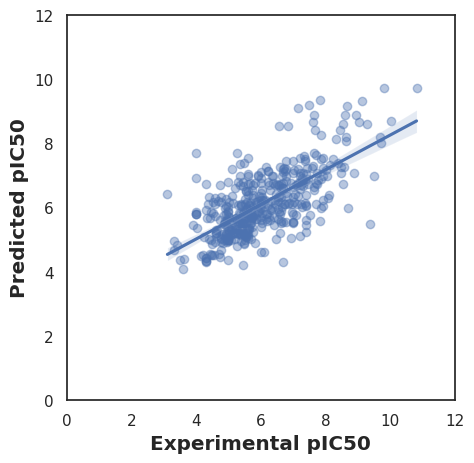

In [ ]:
#Ploting results of experimental pIC50 vs predicited pIC50
sns.set (color_codes=True)
sns.set_style("white")
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,5)
plt.show
plt.savefig('Experimental_vs_Predicted_pIC50.pdf')

In [ ]:
! zip -r results.zip . -i *.csv *.pdf

Scanning files ...
  adding: plot_MW.pdf (deflated 37%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: mannwhitneyu_LogP.csv (deflated 7%)
  adding: bioactivity_data.csv (deflated 81%)
  adding: plot_ic50.pdf (deflated 36%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: plot_bioactivity_class.pdf (deflated 37%)
  adding: bioactivity_data_pIC50.csv (deflated 96%)
  adding: mannwhitneyu_MW.csv (deflated 9%)
  adding: bioactivity_data_pIC50_1.csv (deflated 76%)
  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: bioactivity_data_pIC50_2.csv (deflated 76%)
  adding: new_bioacivity_preprocessed.csv (deflated 79%)
  adding: descriptors_output.csv (deflated 96%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_NumHDonors.pdf (deflated 38%)
  adding: Experimental_vs_Predicted_pIC50.pdf (deflated 21%)


In [ ]:
!cp results.zip "/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data"

cp: cannot create regular file '/content/gdrive/My Drive/BINF_Project/Colab Notebooks/data': No such file or directory
